### 蒙特卡洛计算VaR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("PTR.csv")
df.set_index("Date", inplace=True)
price = df[['Close']]

In [3]:
#用蒙特卡洛模拟初始股票价格
s_0 = price.Close[-1]

daily_returns = price.Close.pct_change()
daily_returns.dropna(inplace=True)
daily_returns.head()

Date
2021-03-09   -0.028963
2021-03-10    0.007588
2021-03-11    0.019216
2021-03-12   -0.014268
2021-03-15    0.024037
Name: Close, dtype: float64

In [4]:
#去年一年的均值和标准差
mu_1 = daily_returns.mean()
sigma_1 = daily_returns.std()

In [5]:
s_0

55.84

In [6]:
mu_1

0.0016248476848526807

In [7]:
sigma_1

0.021736087678903525

### 用布朗运动计算股价变化

In [8]:
def GBM(s_0, mu, sigma, T, n):
    delta_t  = T/n
    simulated_price = [s_0]
    
    #模拟价格走势
    for i in range(n):
        start_price = simulated_price[i]
        epsilon = np.random.normal()
        end_price =  start_price + start_price*(mu*delta_t + sigma*epsilon*np.sqrt(delta_t))
        #价格应该大于0
        end_price = max(0,end_price)
        #将算的结果存入列表
        simulated_price.append(end_price)
    return simulated_price
        

In [9]:
sim1 = GBM(s_0, mu_1, sigma_1, 10, 100)

In [16]:
sim1[2]

55.60915250072798

In [12]:
sim1[-1]

65.12162839423165

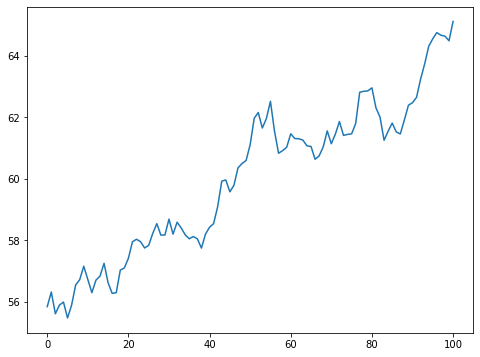

In [13]:
sim1 = pd.Series(sim1)
plt.figure(figsize=(8,6))
plt.plot(sim1)